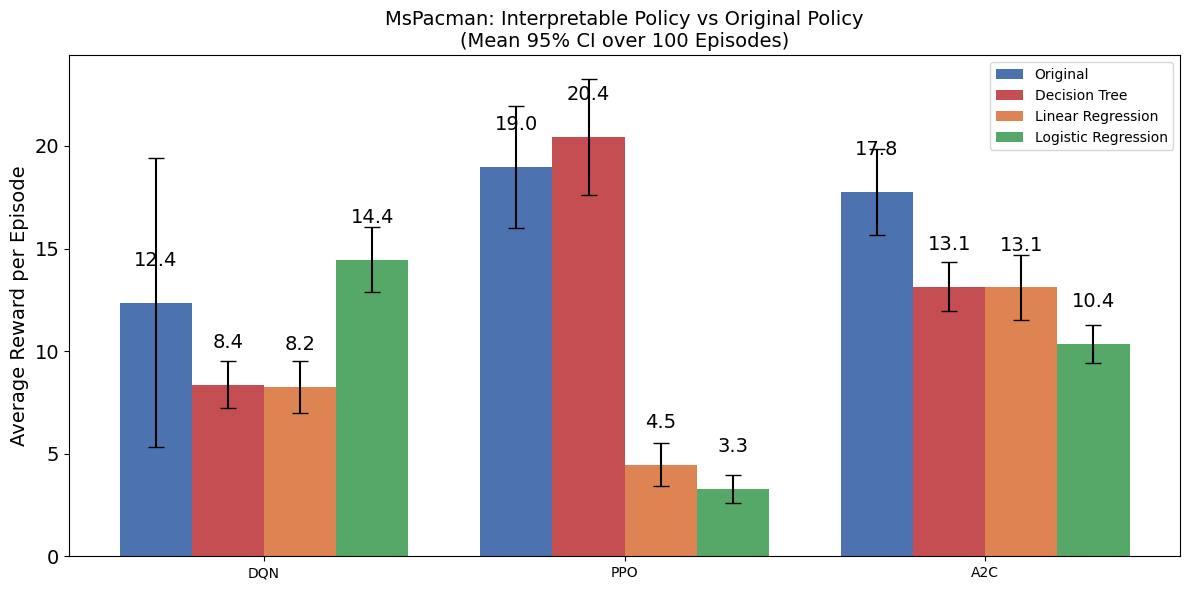

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 定义算法和解释模型
algorithms = ["DQN", "PPO", "A2C"]
models = ["Original", "Decision Tree", "Linear Regression", "Logistic Regression"]
colors = ["#4C72B0", "#C44E52", "#DD8452", "#55A868"]

means = {alg: [] for alg in algorithms}
cis = {alg: [] for alg in algorithms}

# 遍历算法和模型，加载对应的.npy
for alg in algorithms:
    for model in models:
        if model == "Original":
            fname = f"./{alg}_result.npy"
        else:
            fname = f"./{alg}_{model}_result.npy"

        vals = np.load(fname) 
        
        m = np.sum(vals) / 100
        s = np.std(vals, ddof=1)
        ci = 1.96 * s / np.sqrt(len(vals))

        means[alg].append(m)
        cis[alg].append(ci)

x = np.arange(len(algorithms))
width = 0.2

plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    offset = (i - 1.5) * width
    bars = plt.bar(
        x + offset,
        [means[alg][i] for alg in algorithms],
        width,
        yerr=[cis[alg][i] for alg in algorithms],
        capsize=6,
        label=model,
        color=colors[i],
    )
    # 在柱子顶部加数值
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 1.6,   # 高度稍微往上移
            f"{height:.1f}",
            ha="center", va="bottom", fontsize=14
        )

plt.xticks(x, algorithms)
plt.yticks(fontsize=14)
plt.ylabel("Average Reward per Episode", fontsize=14)
plt.title("MsPacman: Interpretable Policy vs Original Policy\n(Mean 95% CI over 100 Episodes)", fontsize=14) 
plt.legend()
plt.tight_layout()
plt.show()


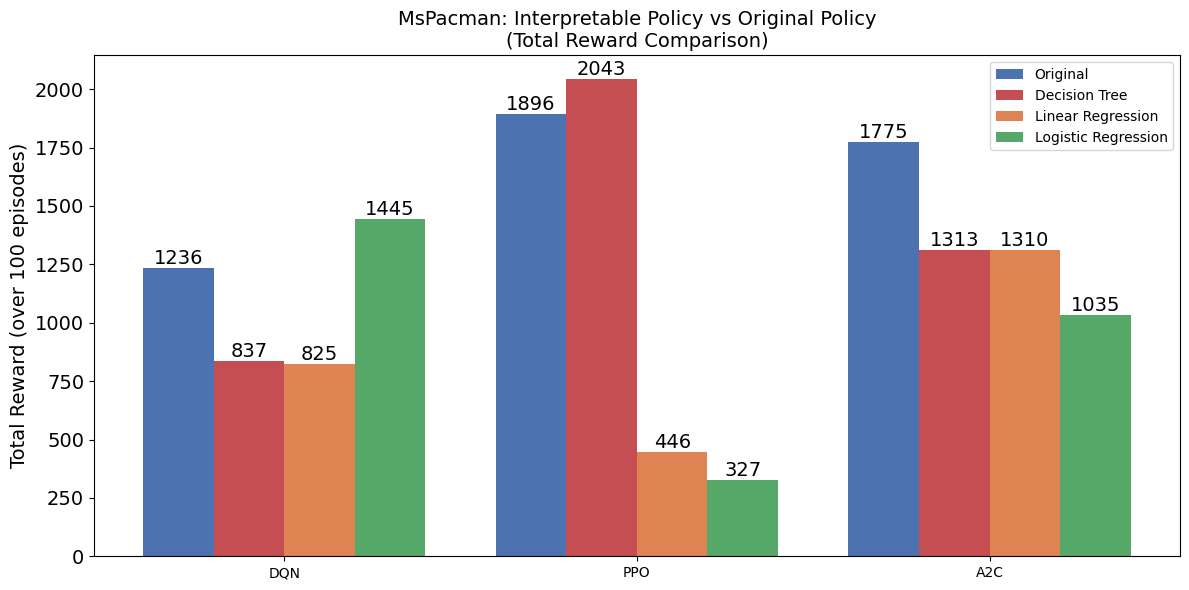

In [28]:
algorithms = ["DQN", "PPO", "A2C"]
models = ["Original", "Decision Tree", "Linear Regression", "Logistic Regression"]

# 论文风格配色
colors = ["#4C72B0", "#C44E52", "#DD8452", "#55A868"]

totals = {alg: [] for alg in algorithms}

# 遍历三种 RL 算法，加载 total reward
for alg in algorithms:
    for model in models:
        if model == "Original":
            fname = f"./{alg}_result.npy"
        else:
            fname = f"./{alg}_{model}_result.npy"

        vals = np.load(fname)
        totals[alg].append(np.sum(vals))   # 这里用 sum 而不是 mean

x = np.arange(len(algorithms))
width = 0.2

plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    offset = (i - 1.5) * width
    bars = plt.bar(
        x + offset,
        [totals[alg][i] for alg in algorithms],
        width,
        label=model,
        color=colors[i],
    )
    # 在柱子上加数值
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height,
            f"{height:.0f}",  # 总奖励整数即可
            ha="center", va="bottom", fontsize=14
        )

plt.xticks(x, algorithms)
plt.yticks(fontsize=14)
plt.ylabel("Total Reward (over 100 episodes)", fontsize=14)
plt.title("MsPacman: Interpretable Policy vs Original Policy\n(Total Reward Comparison)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()
